# Handwriting Recognition
* [Data Munging](#Import-Data)
    * [Visualize Data](#Visulalize-Data)
* [PCA](#PCA)
    * [Visualizing PCA components](#Displaying-PCA-components)
* [Classification](#Classification)
    * [kNN](#kNN-Classifier)
    * [SVM](#SVM)
    * [Random Forests](#Random-Forests)
* [Final Prediction](#Test-Submission)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Anaconda2\envs\python3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Import Data

In [156]:
train_df=pd.read_csv('../input/train.csv')
test_df=pd.read_csv('../input/test.csv')

In [4]:
train_df.info()
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visulalize Data

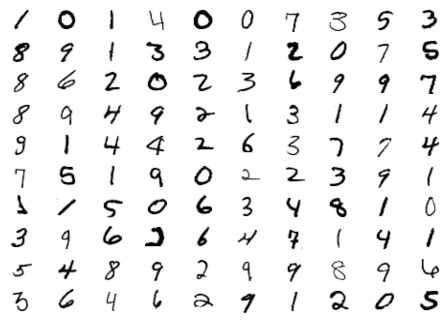

In [5]:
def display(data, indices=[1], label=False):
    im_ar=[]
    labels=[]
    ncols=10
    nrows=int((len(indices)-1e-6)/ncols)+1
    fig, axes=plt.subplots(nrows, ncols)
    axes_=axes.reshape(nrows*ncols,)
    for i,ax in zip(indices, axes_):
        img= data.ix[i,:].reshape(28,28)
        img=255-img.reshape(28,28)
        ax.imshow(img,cmap='Greys_r')
        im_ar.append(img)
        ax.set_xticks([])
        ax.set_yticks([])

display(train_df.drop(['label'], axis=1), indices=range(0,100,1))

## PCA 

In [6]:
from sklearn import decomposition
ncomps=20
img_df=train_df.drop('label', axis=1)
pca = decomposition.PCA(n_components=ncomps)
pca.fit(img_df)

PCA(copy=True, n_components=20, whiten=False)

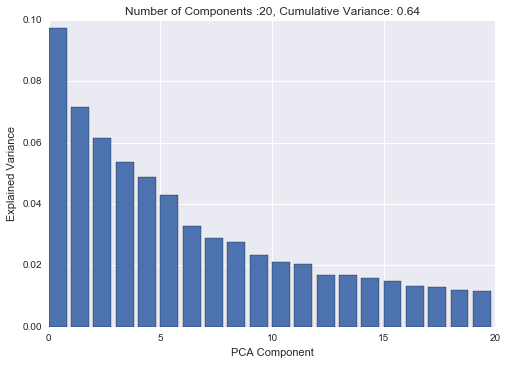

In [7]:
pca_score = pca.explained_variance_ratio_
V = pca.components_
n_pca=list(range(ncomps))
plt.bar(n_pca, pca_score)
plt.ylabel('Explained Variance')
plt.xlabel('PCA Component')
plt.title('Number of Components :'+ str(len(n_pca))+ ', Cumulative Variance: '+ str( '{:.2f}'.format(np.sum(pca_score))))

#### Displaying PCA components

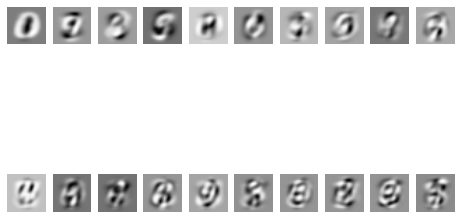

In [8]:
#Display PCA variances

pca_comps=pd.DataFrame(V)
display(pca_comps, range(ncomps))

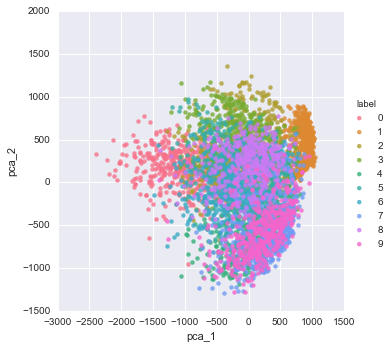

In [97]:
# Starting to differentiate using PCA components
img_pca=pca.transform(img_df)
def pca_to_df(img_pca):
    pca_df=pd.DataFrame()
    for n in range(img_pca.shape[1]):
        var='pca_'+str(n+1)
        pca_df[var]=img_pca.transpose()[n]
    return pca_df
pca_df=pca_to_df(img_pca)
pca_df['label']=train_df['label']
sns.lmplot(x='pca_1', y='pca_2', data=pca_df[:5000], hue='label', fit_reg=False)

In [10]:
pca_df.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,...,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,label
0,661.595780,699.311328,-183.282040,120.611394,-81.081811,489.461886,-683.470838,85.559387,-348.548052,202.978545,...,-21.265756,404.441449,-97.052545,61.839936,-86.780027,17.658144,-285.484696,18.827303,-207.642731,1
1,-1701.451685,360.551556,501.805594,335.423656,-442.378933,738.404049,653.875438,-176.600677,7.520175,67.846273,...,-46.551842,-70.435775,-342.692097,377.839952,-5.665827,317.765748,-87.612618,-94.531168,175.028270,0
2,886.894434,293.765782,-67.155310,78.263763,-473.715921,-323.540638,437.799098,-305.377740,195.295503,-25.626023,...,-252.106647,54.557888,-58.590892,163.090574,-162.494140,-100.318548,155.369350,70.204884,182.797458,1
3,165.755602,-300.182761,64.145485,759.706261,-425.844379,157.390337,-304.099140,276.408982,45.867215,-295.477581,...,256.884297,-87.734190,-175.361267,40.051708,-87.536324,54.278881,-199.848998,-11.826201,-298.091710,4
4,-1923.709716,449.153069,548.613023,188.555147,-651.736273,990.063824,564.507042,-255.915217,-124.914693,177.566843,...,-333.721902,-213.056379,-354.643577,93.476736,26.794226,232.994137,54.739648,-45.342566,256.209640,0


## Classification

In [56]:
from sklearn.cross_validation import train_test_split
def accuracy(ytest, ypred):
    pred=pd.DataFrame()
    pred['label']=ytest
    pred['Predicted']=ypred
    pred['Accuracy']=1*(pred.label==pred.Predicted)
    pred = pred.groupby('label').mean()
    return pred.drop(['Predicted'], axis=1)

def extract_pca(data_df):
    """Returns X and Y after PCA"""
    data_pca=pca.transform(data_df.drop(['label'], axis=1))
    X=pca_to_df(data_pca)
    X.index=data_df.index
    Y=data_df['label']
    return X,Y

def train_test(data=train_df):
    m=list(range(len(data)))
    tr, te=train_test_split(m)
    train_split, test_split=data.ix[tr, :], data.ix[te, :]
    return train_split, test_split


def predict(clf, train_df=train_df, test_df=test_df, pca=True):
    """Returns predicted values"""
    if pca:
        Xtrain, Ytrain =train_test_pca(train_df)
        Xtest, Ytest = train_test_pca(test_df)
    else:
        Xtrain, Ytrain = train_df.drop(['label'], axis=1), train_df['label']
        Xtest, Ytest = test_df.drop(['label'], axis=1), test_df['label']
    clf.fit(Xtrain, Ytrain)
    return clf.predict(Xtest)
    

In [12]:
#Cross Validation splitting
train_split, test_split = train_test(train_df)
Xtrain,Ytrain=extract_pca(train_split)
Xtest, Ytest = extract_pca(test_split)

### kNN Classifier

In [13]:
# Cross validation to determine optimum k
from sklearn.neighbors import KNeighborsClassifier
ks=[1,5,11,21,51,101]
test_accuracy=[]
for k in ks:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(Xtrain, Ytrain)
    ypred = neigh.predict(Xtest)
    pred=accuracy(Ytest, ypred)
    test_accuracy.append(pred.mean())

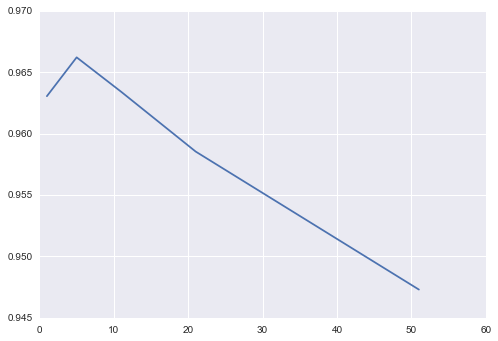

In [14]:
# k=5 turns out to be the best
plt.plot(ks[:5], test_accuracy[:5])

In [15]:
#Testing k=5
k=5
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(Xtrain, Ytrain)
ypred = neigh.predict(Xtest)

In [16]:
#Results for k=5
pred=accuracy(Ytest, ypred)
print (pred)
print (pred.mean())

       Accuracy
label          
0      0.994169
1      0.989160
2      0.979730
3      0.950743
4      0.957916
5      0.954910
6      0.990566
7      0.960679
8      0.944238
9      0.940060
Accuracy    0.966217
dtype: float64


### SVM

In [18]:
from sklearn.svm import SVC

In [88]:
#Try with 1000 samples first
train_split, test_split = train_test(train_df[:2000])
Xtrain,Ytrain=extract_pca(train_split)
Xtest, Ytest = extract_pca(test_split)

In [119]:
ac=[]
for c in [ 0.1, 1, 10, 100]:
    for g in [5e-7, 1e-6, 2e-6]:
        clf=SVC(C=c, gamma=g)
        clf.fit(Xtrain,Ytrain)
        svm_pred=clf.predict(Xtest)
        ac.append([c,g,accuracy(Ytest, svm_pred).mean()])
ac

[[0.1, 5e-07, Accuracy    0.876221
  dtype: float64], [0.1, 1e-06, Accuracy    0.853344
  dtype: float64], [0.1, 2e-06, Accuracy    0.231819
  dtype: float64], [1, 5e-07, Accuracy    0.941376
  dtype: float64], [1, 1e-06, Accuracy    0.948005
  dtype: float64], [1, 2e-06, Accuracy    0.935104
  dtype: float64], [10, 5e-07, Accuracy    0.941742
  dtype: float64], [10, 1e-06, Accuracy    0.944473
  dtype: float64], [10, 2e-06, Accuracy    0.935716
  dtype: float64], [100, 5e-07, Accuracy    0.941742
  dtype: float64], [100, 1e-06, Accuracy    0.944473
  dtype: float64], [100, 2e-06, Accuracy    0.935716
  dtype: float64]]

In [142]:
# Now try all samples
train_split, test_split = train_test(train_df)
Xtrain,Ytrain=extract_pca(train_split)
Xtest, Ytest = extract_pca(test_split)
svm=SVC(C=1, gamma=1e-6)
svm.fit(Xtrain,Ytrain)
svm_pred=svm.predict(Xtest)

In [143]:
svm_accuracy=accuracy(Ytest, svm_pred)
print (svm_accuracy)
print (svm_accuracy.mean())

       Accuracy
label          
0      0.991133
1      0.991327
2      0.978525
3      0.963922
4      0.971126
5      0.970370
6      0.989216
7      0.981530
8      0.971087
9      0.954633
Accuracy    0.976287
dtype: float64


### Random Forests

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(Xtrain,Ytrain)
rand_pred=clf.predict(Xtest)

In [136]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [135]:
rf_accuracy=accuracy(Ytest, rand_pred)
print (rf_accuracy)
print (rf_accuracy.mean())

       Accuracy
label          
0      0.980806
1      0.979789
2      0.940584
3      0.935150
4      0.943284
5      0.930136
6      0.981481
7      0.938865
8      0.903042
9      0.905088
Accuracy    0.943822
dtype: float64


## Test Submission

In [157]:
test_pca=pca.transform(test_df)
test_pca=pca_to_df(test_pca)

In [158]:
test_pred=svm.predict(test_pca)

In [159]:
test_df['Label']=test_pred

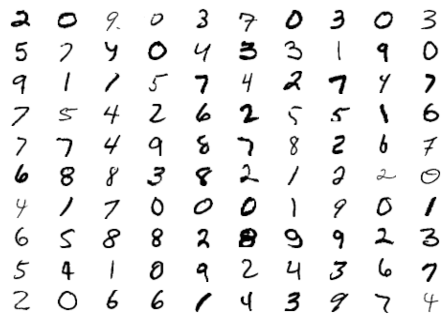

In [160]:
display(test_df.drop(['Label'], axis=1), indices=range(0,100,1))

In [165]:
test_df['ImageId']=test_df.index

In [167]:
test_df[['ImageId','Label']].to_csv('../submission.csv', index=False)